Really simple PD control for the "reacher" system, which is just a fully actuated 2DOF arm
done as a sanity check for the way I was doing PD control on the walker

In [5]:
import mujoco_py as mj
import numpy as np
from math import pi
import copy
from matplotlib.pyplot import plot, legend,figure, title

%matplotlib inline


model_xml = open('reacher.xml').read()
model = mj.load_model_from_xml(model_xml)
sim = mj.MjSim(model)
viewer = mj.MjViewer(sim)

default_state = copy.deepcopy(sim.get_state())

Creating window glfw


In [2]:
sim.reset()
sim.set_state(default_state)

num_steps = 400
set_points = np.array([-pi/2,-pi/2])
p_gains = 1*np.ones((1,2))
d_gains = .1*np.ones((1,2))
num_pos = default_state[1].size
num_vel = default_state[2].size
num_u = sim.data.ctrl.size

q_pos_hist = np.zeros((num_steps, num_pos))
q_vel_hist = np.zeros((num_steps, num_vel))
u_vals_hist = np.zeros((num_steps, num_u))

while(True):
    for i in range(num_steps):
        
        q_pos = sim.get_state()[1]
        q_vel = sim.get_state()[2]
        
        
        sim.data.ctrl[:] = (set_points - q_pos[0:2])*p_gains + (np.zeros((1,2)) - q_vel[0:2])*d_gains
    
        q_pos_hist[i,:] = q_pos
        q_vel_hist[i,:] = q_vel
        u_vals_hist[i,:] = sim.data.ctrl[:]

        sim.step()
        viewer.render() 
    
    
    
    sim.set_state(default_state) #reset everything at the end of the loop

KeyboardInterrupt: 

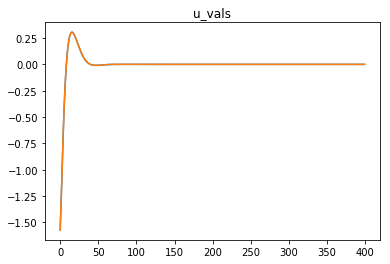

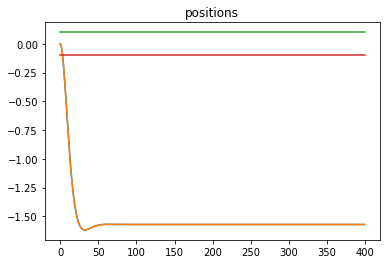

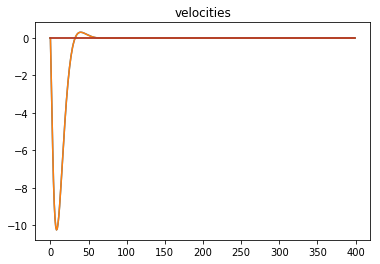

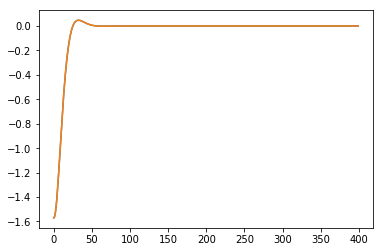

In [6]:
#some plotting
plot(u_vals_hist)
title('u_vals')
figure()

plot(q_pos_hist)
title('positions')
figure()

plot(q_vel_hist)
title('velocities')
figure()

plot(set_points - q_pos_hist[:,0:2])